In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import graphviz
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('..\data\shortCleanData.csv')

In [3]:
#df = Mdf.sample(frac=1, random_state=42)
#df = df.iloc[:len(df)//4]
print(df.shape)
df.info()

(24639, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24639 entries, 0 to 24638
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   1-Abschluss                             24639 non-null  object
 1   1-Abschluss in DE                       24639 non-null  object
 2   1-Deutscher Ehepartner                  24639 non-null  object
 3   1-EB/NE erfllt?                         24639 non-null  object
 4   1-Einreisejahr                          24639 non-null  object
 5   1-Antrag EB                             24639 non-null  object
 6   1-Antrag NE                             24639 non-null  object
 7   1-Integrationstest                      24639 non-null  object
 8   1-Jahr AR beantragt/bekommen            24639 non-null  object
 9   1-Jobcenter                             24639 non-null  object
 10  1-Kinder                                24639 non-null  in

In [ ]:
#df.drop(df.select_dtypes(include=['datetime64']).columns, axis=1, inplace=True)
#df.drop(["Grund_der_Absage","sales","Mailing_State","filered_sales.Other_State","filered_sales.Other_City","filered_sales.First_Visited_URL","filered_sales.sales","filered_sales.Mailing_State","filered_sales.id","id.1","Owner.1","Owner.2"], axis=1, inplace=True)
#df.info()

In [4]:
from pycaret.classification import *

In [5]:
import category_encoders as ce

In [6]:
encoder = ce.GLMMEncoder()

In [7]:
#s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=50,normalize=True,normalize_method='robust')
#s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=5,encoding_method=encoder)

#s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=1,normalize=False,normalize_method='minmax',encoding_method=encoder,feature_selection=True,n_features_to_select=0.5,feature_selection_method='sequential',feature_selection_estimator='gb')
s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=1,normalize=False,normalize_method='maxabs',encoding_method=encoder,ordinal_features = {'1-Netto' : ['0 bis 600', '600 bis 1000', '1000 bis 1500','1500 bis 2000','2000 bis 2500','2500 bis 3000','3000 bis 3500','Mehr als 3500'],'1-Sprachzertifikat':['Nein','A1','A2','B1','B2','C1','C2']})

,Description,Value
0,Session id,5646
1,Target,SalesCount
2,Target type,Binary
3,Original data shape,"(24639, 26)"
4,Transformed data shape,"(24639, 20)"
5,Transformed train set shape,"(17247, 20)"
6,Transformed test set shape,"(7392, 20)"
7,Ignore features,6
8,Ordinal features,2
9,Numeric features,1


In [8]:
test_Train = get_config("X_train_transformed")
test_Train

,1-Abschluss,1-Abschluss in DE,1-Deutscher Ehepartner,1-EB/NE erfllt?,1-Einreisejahr,1-Antrag EB,1-Antrag NE,1-Integrationstest,1-Jahr AR beantragt/bekommen,1-Jobcenter,1-Kinder,1-Netto,1-Rente,1-Sprachzertifikat,1-Test Sprache_Deutsch,1-Welches befristete AR haben Sie?,1-Wie ist ihr aktueller Familienstand?,1-Beratung?,1-Gltiger Nationalpass
20523,-0.011186,-0.030378,0.032283,0.039620,0.339352,-0.013095,0.000366,0.086871,0.199650,-0.142054,0.0,3.0,-0.054809,0.0,1.0,0.242527,-0.089914,0.0,0.160975
14313,0.073751,-0.030378,0.090909,0.039620,-0.895294,-0.274329,-0.339420,0.086871,-0.056112,0.136968,3.0,5.0,-0.054809,6.0,1.0,0.196607,-0.150849,1.0,-0.255662
210,-0.189527,-0.030378,0.032283,0.039620,-0.401764,-0.274329,0.000366,0.086871,0.199650,-0.142054,0.0,0.0,-0.054809,0.0,1.0,0.242527,-0.089914,1.0,-0.255662
4954,0.132285,0.101572,0.090909,0.039620,-0.379422,-0.274329,-0.339420,0.086871,-0.072961,-0.142054,0.0,4.0,-0.054809,4.0,1.0,-0.062260,-0.150849,1.0,-0.255662
8137,0.073751,-0.030378,0.032283,0.039620,0.301309,-0.274329,-0.339420,0.086871,-0.136519,-0.142054,0.0,3.0,-0.054809,3.0,1.0,-0.508586,-0.089914,0.0,-0.255662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11059,-0.189527,-0.030378,0.032283,0.039620,0.339352,-0.274329,-0.339420,0.086871,0.245622,-0.142054,0.0,3.0,0.003837,3.0,1.0,0.279295,-0.089914,1.0,-0.255662
9613,0.073751,-0.030378,0.032283,0.039620,0.339352,-0.274329,-0.339420,-0.047385,-0.056112,-0.142054,0.0,3.0,-0.054809,0.0,1.0,0.222365,-0.089914,1.0,-0.255662
16413,-0.056656,-0.085454,-0.142519,0.039620,-0.895294,-0.274329,-0.339420,0.086871,-0.056112,-0.142054,1.0,0.0,-0.054809,3.0,1.0,-0.259821,-0.150849,1.0,-0.255662
4686,0.132285,0.101572,-0.142519,0.039620,-0.019028,-0.274329,-0.339420,0.086871,-0.155158,-0.142054,0.0,3.0,-0.054809,3.0,1.0,-0.313688,-0.150849,1.0,-0.255662


In [10]:
#best_model = compare_models(include=['nb'],sort='Recall')
# nb,lightgbm,gbc,lda
best_model = compare_models(sort='F1',cross_validation=False,probability_threshold=0.09)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7247,0.8039,0.7352,0.1437,0.2404,0.1568,0.2359,13.0200
lda,Linear Discriminant Analysis,0.7394,0.8019,0.6849,0.1437,0.2375,0.1547,0.2244,11.7500
lr,Logistic Regression,0.7143,0.8021,0.7352,0.1389,0.2337,0.1488,0.2280,11.6100
lightgbm,Light Gradient Boosting Machine,0.7401,0.7967,0.6461,0.1381,0.2276,0.1440,0.2069,12.9600
nb,Naive Bayes,0.6893,0.7812,0.7260,0.1275,0.2168,0.1290,0.2062,11.2300
rf,Random Forest Classifier,0.7422,0.7534,0.5868,0.1297,0.2124,0.1277,0.1805,11.7300
et,Extra Trees Classifier,0.7681,0.7094,0.4977,0.1273,0.2028,0.1197,0.1583,11.9900
knn,K Neighbors Classifier,0.7738,0.6381,0.4817,0.1274,0.2015,0.1190,0.1551,11.2600
dt,Decision Tree Classifier,0.8822,0.5619,0.1986,0.1433,0.1665,0.1049,0.1065,11.1800
ada,Ada Boost Classifier,0.0593,0.8007,1.0000,0.0593,0.1119,0.0000,0.0000,12.0800


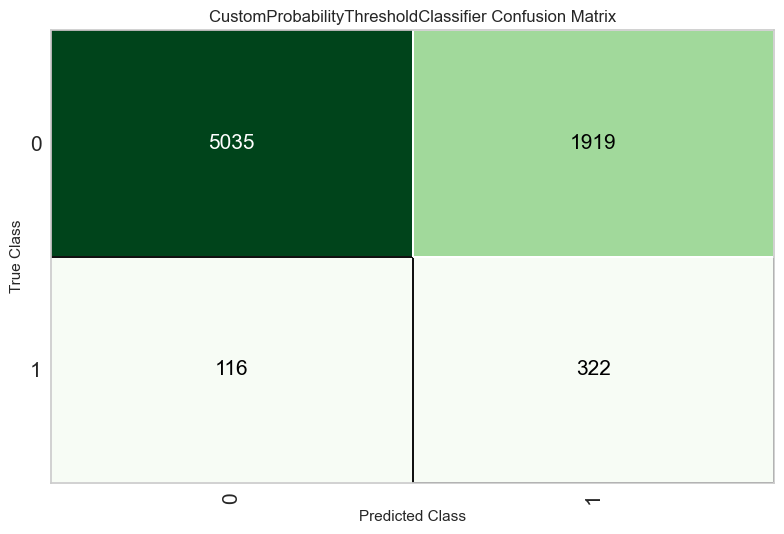

In [11]:
plot_model(best_model, plot = 'confusion_matrix')

In [12]:
df2 = pd.read_csv('..\data\withoutClassLabelHClust.csv')

In [13]:
print(df2.shape)
df2.info()

(24639, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24639 entries, 0 to 24638
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   1-Abschluss                             24639 non-null  object
 1   1-Abschluss in DE                       24639 non-null  object
 2   1-Deutscher Ehepartner                  24639 non-null  object
 3   1-EB/NE erfllt?                         24639 non-null  object
 4   1-Einreisejahr                          24639 non-null  object
 5   1-Antrag EB                             24639 non-null  object
 6   1-Antrag NE                             24639 non-null  object
 7   1-Integrationstest                      24639 non-null  object
 8   1-Jahr AR beantragt/bekommen            24639 non-null  object
 9   1-Jobcenter                             24639 non-null  object
 10  1-Kinder                                24639 non-null  in

In [14]:
s = setup(df2, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=1,normalize=False,normalize_method='maxabs',encoding_method=encoder,ordinal_features = {'1-Netto' : ['0 bis 600', '600 bis 1000', '1000 bis 1500','1500 bis 2000','2000 bis 2500','2500 bis 3000','3000 bis 3500','Mehr als 3500'],'1-Sprachzertifikat':['Nein','A1','A2','B1','B2','C1','C2']})


,Description,Value
0,Session id,8098
1,Target,SalesCount
2,Target type,Binary
3,Original data shape,"(24639, 27)"
4,Transformed data shape,"(24639, 21)"
5,Transformed train set shape,"(17247, 21)"
6,Transformed test set shape,"(7392, 21)"
7,Ignore features,6
8,Ordinal features,2
9,Numeric features,1


In [15]:
best_model2 = compare_models(sort='F1',cross_validation=False,probability_threshold=0.09)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7367,0.8081,0.7306,0.1490,0.2475,0.1653,0.2432,13.7000
lr,Logistic Regression,0.7297,0.8066,0.7489,0.1480,0.2472,0.1645,0.2460,11.9900
lightgbm,Light Gradient Boosting Machine,0.7496,0.8038,0.6826,0.1487,0.2442,0.1627,0.2316,13.7900
lda,Linear Discriminant Analysis,0.7527,0.8065,0.6735,0.1490,0.2440,0.1628,0.2299,12.4500
nb,Naive Bayes,0.6741,0.7952,0.8174,0.1332,0.2291,0.1417,0.2368,12.4100
rf,Random Forest Classifier,0.7469,0.7624,0.6142,0.1365,0.2233,0.1399,0.1972,12.5700
et,Extra Trees Classifier,0.7727,0.7157,0.5297,0.1360,0.2164,0.1348,0.1780,12.8000
knn,K Neighbors Classifier,0.7729,0.6400,0.4795,0.1264,0.2001,0.1173,0.1532,12.4000
dt,Decision Tree Classifier,0.8793,0.5677,0.2146,0.1464,0.1741,0.1115,0.1139,12.4700
qda,Quadratic Discriminant Analysis,0.3811,0.5729,0.8858,0.0790,0.1450,0.0406,0.1176,12.8400


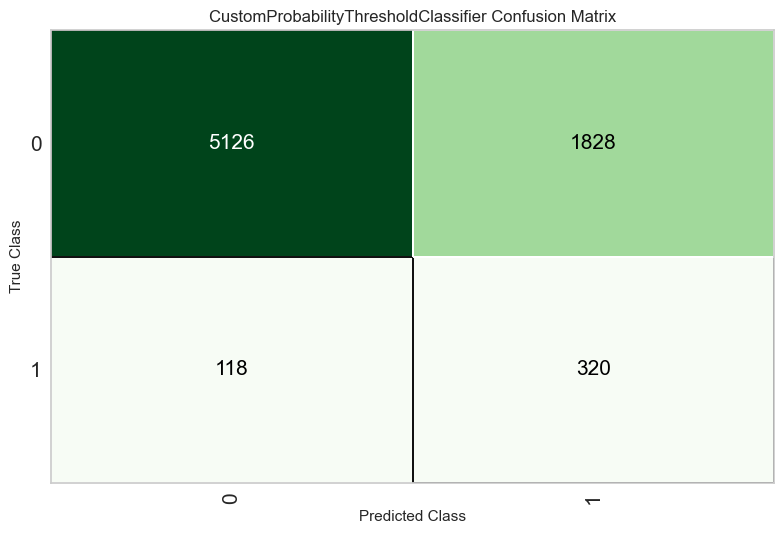

In [16]:
plot_model(best_model2, plot = 'confusion_matrix')

In [17]:
df3 = pd.read_csv('..\data\withoutClassLabelBirch.csv')

In [18]:
print(df3.shape)
df3.info()

(24639, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24639 entries, 0 to 24638
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   1-Abschluss                             24639 non-null  object
 1   1-Abschluss in DE                       24639 non-null  object
 2   1-Deutscher Ehepartner                  24639 non-null  object
 3   1-EB/NE erfllt?                         24639 non-null  object
 4   1-Einreisejahr                          24639 non-null  object
 5   1-Antrag EB                             24639 non-null  object
 6   1-Antrag NE                             24639 non-null  object
 7   1-Integrationstest                      24639 non-null  object
 8   1-Jahr AR beantragt/bekommen            24639 non-null  object
 9   1-Jobcenter                             24639 non-null  object
 10  1-Kinder                                24639 non-null  in

In [19]:
s = setup(df3, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=1,normalize=False,normalize_method='maxabs',encoding_method=encoder,ordinal_features = {'1-Netto' : ['0 bis 600', '600 bis 1000', '1000 bis 1500','1500 bis 2000','2000 bis 2500','2500 bis 3000','3000 bis 3500','Mehr als 3500'],'1-Sprachzertifikat':['Nein','A1','A2','B1','B2','C1','C2']})


,Description,Value
0,Session id,863
1,Target,SalesCount
2,Target type,Binary
3,Original data shape,"(24639, 27)"
4,Transformed data shape,"(24639, 21)"
5,Transformed train set shape,"(17247, 21)"
6,Transformed test set shape,"(7392, 21)"
7,Ignore features,6
8,Ordinal features,2
9,Numeric features,1


In [20]:
best_model3 = compare_models(sort='F1',cross_validation=False,probability_threshold=0.09)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7353,0.7935,0.6941,0.1429,0.2370,0.1539,0.2253,12.0300
gbc,Gradient Boosting Classifier,0.7094,0.7944,0.7420,0.1377,0.2323,0.1471,0.2276,12.8600
lr,Logistic Regression,0.7036,0.7981,0.7534,0.1368,0.2315,0.1458,0.2285,11.6200
lightgbm,Light Gradient Boosting Machine,0.7307,0.7840,0.6644,0.1363,0.2262,0.1418,0.2080,12.8400
nb,Naive Bayes,0.6342,0.7769,0.8425,0.1228,0.2144,0.1238,0.2228,11.7200
rf,Random Forest Classifier,0.7420,0.7508,0.5890,0.1300,0.2130,0.1283,0.1815,11.7300
et,Extra Trees Classifier,0.7681,0.7181,0.4886,0.1256,0.1998,0.1165,0.1538,12.4200
knn,K Neighbors Classifier,0.7649,0.6351,0.4795,0.1221,0.1946,0.1106,0.1466,11.6500
dt,Decision Tree Classifier,0.8812,0.5594,0.1941,0.1393,0.1622,0.1001,0.1017,11.4700
qda,Quadratic Discriminant Analysis,0.5413,0.6199,0.6689,0.0828,0.1473,0.0468,0.0955,11.6800


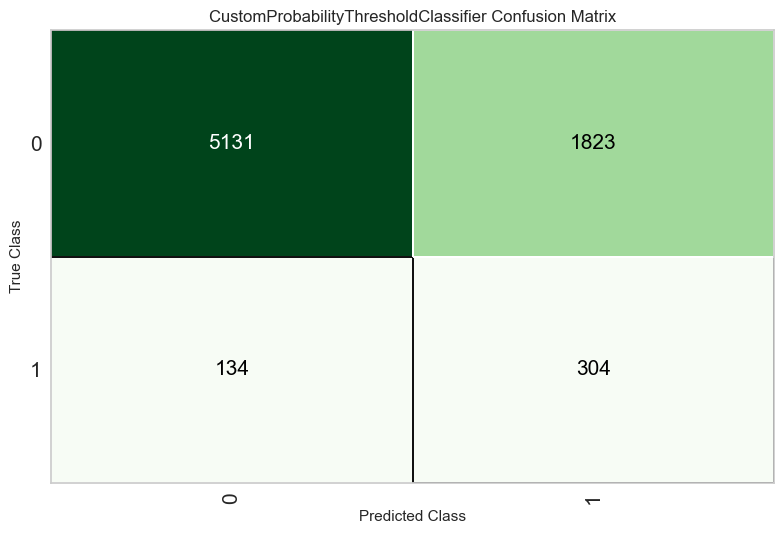

In [21]:
plot_model(best_model3, plot = 'confusion_matrix')

In [22]:
s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year","1-Welches befristete AR haben Sie?"],max_encoding_ohe=1,normalize=False,normalize_method='maxabs',encoding_method=encoder,ordinal_features = {'1-Netto' : ['0 bis 600', '600 bis 1000', '1000 bis 1500','1500 bis 2000','2000 bis 2500','2500 bis 3000','3000 bis 3500','Mehr als 3500'],'1-Sprachzertifikat':['Nein','A1','A2','B1','B2','C1','C2']})

,Description,Value
0,Session id,5156
1,Target,SalesCount
2,Target type,Binary
3,Original data shape,"(24639, 26)"
4,Transformed data shape,"(24639, 19)"
5,Transformed train set shape,"(17247, 19)"
6,Transformed test set shape,"(7392, 19)"
7,Ignore features,7
8,Ordinal features,2
9,Numeric features,1


In [23]:
best_model = compare_models(sort='F1',cross_validation=False,probability_threshold=0.09)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7399,0.7999,0.7123,0.1479,0.2450,0.1628,0.2373,10.2400
gbc,Gradient Boosting Classifier,0.7152,0.8004,0.7534,0.1418,0.2387,0.1544,0.2370,11.5100
lightgbm,Light Gradient Boosting Machine,0.7428,0.7961,0.6804,0.1447,0.2387,0.1562,0.2250,11.1600
lr,Logistic Regression,0.7022,0.8008,0.7785,0.1395,0.2366,0.1513,0.2389,10.2200
nb,Naive Bayes,0.6671,0.7824,0.8059,0.1294,0.2229,0.1345,0.2271,10.5100
rf,Random Forest Classifier,0.7419,0.7542,0.5799,0.1284,0.2103,0.1254,0.1771,10.6500
et,Extra Trees Classifier,0.7626,0.7146,0.5046,0.1256,0.2012,0.1174,0.1571,10.4800
knn,K Neighbors Classifier,0.7676,0.6397,0.4886,0.1253,0.1994,0.1161,0.1533,10.4500
dt,Decision Tree Classifier,0.8750,0.5547,0.1918,0.1284,0.1538,0.0892,0.0913,10.5500
ada,Ada Boost Classifier,0.0593,0.7958,1.0000,0.0593,0.1119,0.0000,0.0000,10.9700


In [ ]:
plot_model(best_model, plot = 'feature')

In [ ]:
# create copy of data
data_new = df.copy()
#data_new.drop('salesX', axis=1, inplace=True)
# generate labels using predict_model
finals=predict_model(best_model, data=data_new, raw_score=True)
finals.to_csv('shortSMOTE_LDA.csv', index=False)

In [ ]:
s2 = setup(df, target = 'Sales', ignore_features = ["Id"],fix_imbalance=True)

In [ ]:
best_model2 = compare_models(sort='Recall')

In [ ]:
plot_model(best_model2, plot = 'confusion_matrix')

In [ ]:
best_model3 = compare_models(include=['lda'],sort='Recall')

In [ ]:
plot_model(best_model3, plot = 'confusion_matrix')

In [ ]:
# create copy of data
#data_new = df.copy()
#data_new.drop('salesX', axis=1, inplace=True)
# generate labels using predict_model
finals=predict_model(best_model3, raw_score=True)
finals.to_csv('short_LDA.csv', index=False)

In [ ]:
best_model4 = compare_models(include=['gbc'],sort='Recall')

In [ ]:
plot_model(best_model4, plot = 'confusion_matrix')

In [ ]:
# # create a custom function
# def calculate_profit(y, y_pred):
#     tp = np.where((y_pred==1) & (y==1), (1500-15), 0)
#     fp = np.where((y_pred==1) & (y==0), -15, 0)
#     fn = np.where((y_pred==0) & (y==1), -1500, 0)
#     return np.sum([tp,fp,fn])
# # add metric to PyCaret
# add_metric('profit', 'Profit', calculate_profit)

def custom_metric(y,y_pred):
    tp = np.where((y_pred==1)&(y==1),1,0)
    fp = np.where((y_pred==1)&(y==0),-1,0)
    fn = np.where((y_pred==0)&(y==1),-0.5,0)
    return np.sum([tp,fp,np])

add_metric('customTest','CustomeTest',custom_metric)

In [ ]:
best_model5 = compare_models(probability_threshold=0.75,sort='Recall')

In [ ]:
plot_model(best_model5, plot = 'confusion_matrix')

In [ ]:
best_model6 = compare_models(include=['svm'],probability_threshold=0.75,sort='Recall')

In [ ]:
plot_model(best_model6, plot = 'confusion_matrix')

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')